In [30]:
import pandas as pd
import seaborn as sns
import datetime
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

## Getting Browser History Data

In [43]:
df = pd.read_csv('Takeout\Fit\Daily Summaries.csv', encoding='utf8')
print(df.shape)
df.head()   

(549, 18)


,Date,Calories (kcal),Distance (m),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Biking duration (ms),Inactive duration (ms),Walking duration (ms),Running duration (ms)
0,2015-08-26,1077.768677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-08-27,1593.249878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-08-28,1593.249878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-08-29,1593.249878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-08-30,1593.249878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# percent of null in each column

pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns=['% Missing value']).round(2)

,% Missing value
Date,0.00
Calories (kcal),0.00
Distance (m),6.38
Low latitude (deg),46.45
Low longitude (deg),46.45
High latitude (deg),46.45
High longitude (deg),46.45
Average speed (m/s),56.47
Max speed (m/s),56.47
Min speed (m/s),56.47


In [13]:
#page_transition: Contains info on the type of page open like reload, type & enter, link open etc.

df = df[['Date', 'Calories (kcal)', 'Distance (m)', 'Step count', 'Average weight (kg)']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 5 columns):
Date                   549 non-null object
Calories (kcal)        549 non-null float64
Distance (m)           514 non-null float64
Step count             518 non-null float64
Average weight (kg)    2 non-null float64
dtypes: float64(4), object(1)
memory usage: 21.5+ KB


In [15]:
df.Date = df.Date.astype(np.datetime64)

C:\Users\gvghonga\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


## Extracting/Extrapolating new columns(features):

In [17]:
days_arr = ["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

def get_day_of_week(x):
    return days_arr[x.weekday()]

def get_month(x):
    return x.month

def get_year(x):
    return x.year

def get_hour(x):
    return x.hour

def get_week(x):
    return x.isocalendar()[1]

def is_weekend(x):
    if x in ['Sat', 'Sun']:
        return 'Y'
    else:
        return 'N'

In [39]:
df['day'] = pd.to_datetime(df.Date).dt.day
df['year'] = pd.to_datetime(df.Date).dt.year
df['month'] = pd.to_datetime(df.Date).dt.month
df['weekday'] = pd.to_datetime(df.Date).dt.weekday
df['year_month']=df.apply(lambda x:'{}_{}'.format(str(x['year']),str(x['month'])),axis=1)

In [19]:
df['is_weekend'] = df['day'].apply(is_weekend)

In [21]:
df = df[~pd.isnull(df['Step count'])]
df.shape

(518, 10)

In [27]:
df['Distance (m)'] = np.round(df['Distance (m)'], 2)
df['Calories (kcal)'] = np.round(df['Calories (kcal)'], 2)

In [28]:
df.head()

,Date,Calories (kcal),Distance (m),Step count,Average weight (kg),day,year,month,weekday,is_weekend
13,2015-09-09,1290.37,3310.98,5154.0,74.0,9,2015,9,2,N
14,2015-09-10,1873.62,3292.64,6458.0,NaN,10,2015,9,3,N
15,2015-09-11,2387.05,6695.96,11486.0,NaN,11,2015,9,4,N
16,2015-09-12,1735.31,2412.98,4131.0,NaN,12,2015,9,5,N
17,2015-09-13,1958.76,142.79,1322.0,NaN,13,2015,9,6,N


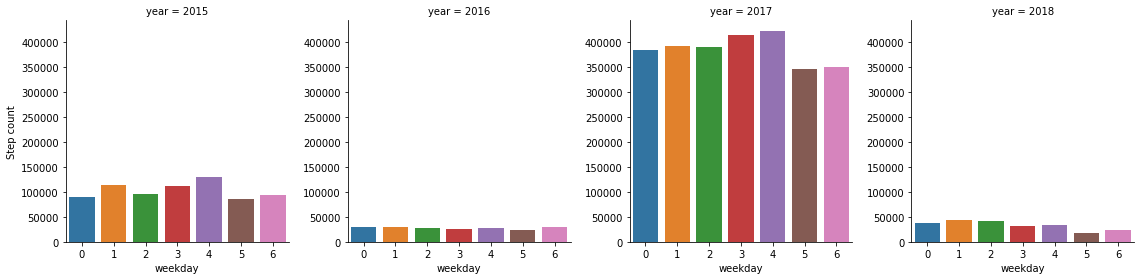

In [32]:
plt.figure(figsize=(100,5))
g = sns.factorplot(x='weekday', y='Step count', data=df, col='year', kind='bar', estimator=sum,ci=None,size=4,aspect=1)

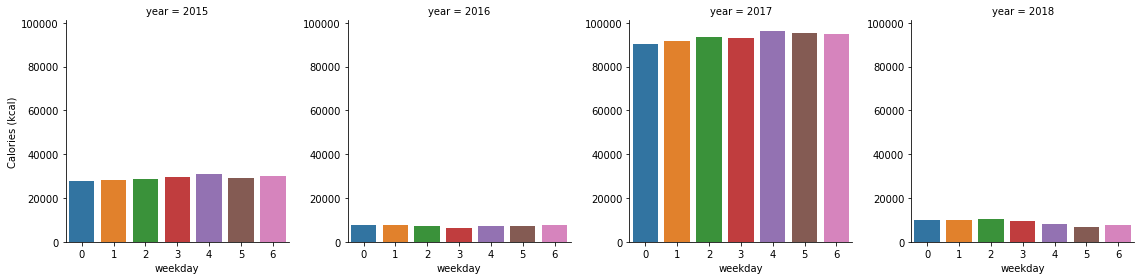

In [34]:
plt.figure(figsize=(100,5))
g = sns.factorplot(x='weekday', y='Calories (kcal)', data=df, col='year', kind='bar', estimator=sum,ci=None,size=4,aspect=1)

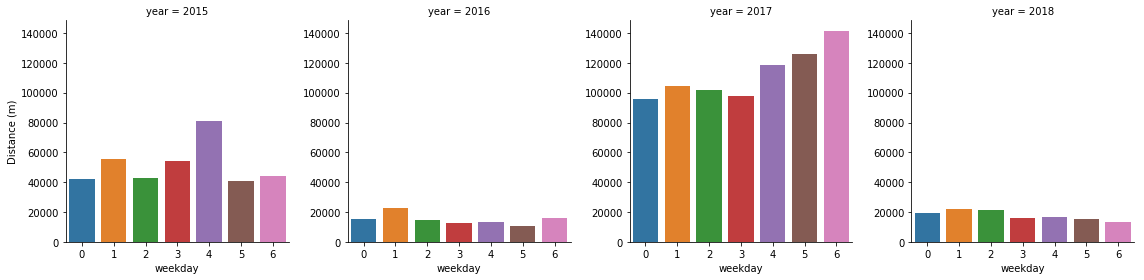

In [35]:
plt.figure(figsize=(100,5))
g = sns.factorplot(x='weekday', y='Distance (m)', data=df, col='year', kind='bar', estimator=sum,ci=None,size=4,aspect=1)

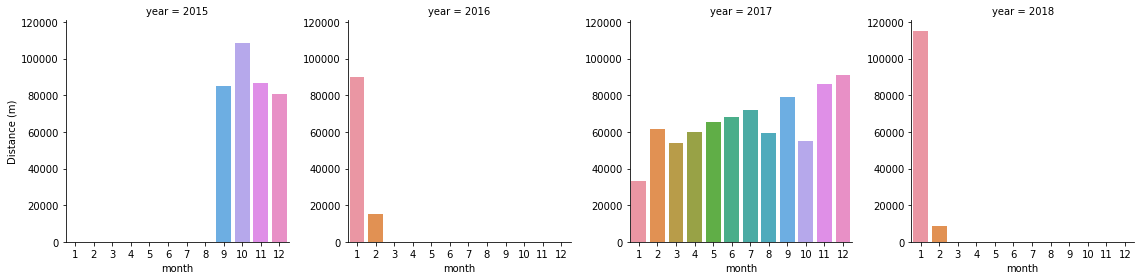

In [42]:
plt.figure(figsize=(100,5))
g = sns.factorplot(x='month', y='Distance (m)', data=df, col='year', kind='bar', estimator=sum,ci=None,size=4,aspect=1)